In [1]:
# Mainly an obsolete version of plot_clustered_waterfalls_C23.ipynb.

import glob
import numpy as np
import blimpy as bl
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis, norm
%matplotlib inline

numexpr.utils   INFO     Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
numexpr.utils   INFO     NumExpr defaulting to 8 threads.


In [2]:
#labels_list = np.load('/datax/scratch/benjb/hdbscan_labels_5_3_0.19.npz')['arr_0'] # without frequency, with abs(DR)
labels_list = np.load('/datax/scratch/benjb/hdbscan_PCA_labels_M31_setigen_HIP_2792_HIP3223_10_2_0.15.npz')['arr_0']

In [3]:
lfiles = ['/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17168_HIP3077_0060.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17801_HIP3223_0062.gpuspec.0000.h5']

filename = '/datax/scratch/benjb/m31_l_data/' + lfiles[0][44:-2] + 'dat'

df0 = pd.read_table(filename, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                            'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                            'Full_number_of_hits'], skiprows=9)

ctr_freqs = df0['Uncorrected_Frequency'].values

In [4]:
df1 = pd.read_table('/datax/scratch/benjb/m31_observation_with_setigen.dat', sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                            'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                            'Full_number_of_hits'], skiprows=9)

top_hit_no = df1['Top_Hit_#'].values

stg_idxs = np.where((top_hit_no == 111) | (top_hit_no == 1743) | (top_hit_no == 362))[0]

ctr_freqs = np.concatenate((ctr_freqs, df1['Uncorrected_Frequency'].values[stg_idxs]))

In [5]:
df2 = pd.read_table('/datax/scratch/benjb/m31_l_data/' + lfiles[5][44:-2] + 'dat', sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                            'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                            'Full_number_of_hits'], skiprows=9)

df2_idxs = np.where((df2['Uncorrected_Frequency'].values > 1590) & (df2['Uncorrected_Frequency'].values < 1610))[0]

ctr_freqs = np.concatenate((ctr_freqs, df2['Uncorrected_Frequency'].values[df2_idxs]))

In [6]:
df3 = pd.read_table('/datax/scratch/benjb/m31_l_data/' + lfiles[1][44:-2] + 'dat', sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                            'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                            'Full_number_of_hits'], skiprows=9)


ctr_freqs = np.concatenate((ctr_freqs, df3['Uncorrected_Frequency'].values))

In [7]:
print(len(ctr_freqs))

6396


In [8]:
fb1 = bl.Waterfall('/datax/scratch/benjb/m31_observation_with_setigen.fil')
fb2 = bl.Waterfall('/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17801_HIP3223_0062.gpuspec.0000.h5')
fb3 = bl.Waterfall('/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5')

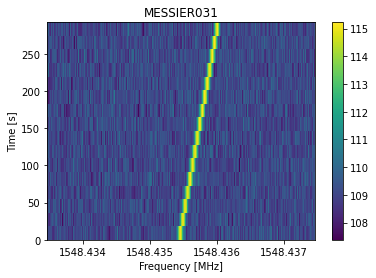

In [21]:
cf = 1598.324118
cf = 1548.435456
cf = 1548.435466
#cf = 1548.437656
bw = 0.004
fb.plot_waterfall(f_start = cf-bw/2, f_stop = cf+bw/2, logged=True)

In [27]:
sorted_anomalous_idxs = np.load('/datax/scratch/benjb/sorted_anomalous_idxs_setigen__6_2_0.2.npz')['arr_0']
sorted_distance_rankings = np.load('/datax/scratch/benjb/sorted_distance_rankings_setigen_6_2_0.2.npz')['arr_0']

In [19]:
print(df0['freq_start'].values[-3:])

[1525.98776  1521.501754 1520.002187]


Plotting class -1 ...
60
Plotting class 0 ...
4
Plotting class 1 ...
3
Plotting class 2 ...
7
Plotting class 3 ...
7
Plotting class 4 ...
5
Plotting class 5 ...
8
Plotting class 6 ...
3
Plotting class 7 ...
3
Plotting class 8 ...
3
Plotting class 9 ...
2
Plotting class 10 ...
3
Plotting class 11 ...
3
Plotting class 12 ...
3
Plotting class 13 ...
6
Plotting class 14 ...
60
Plotting class 15 ...
3
Plotting class 16 ...
35
Plotting class 17 ...
3
Plotting class 18 ...
60


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Plotting class 19 ...
4


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Plotting class 20 ...
2


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Plotting class 21 ...
60


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Plotting class 22 ...
5


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 432x288 with 0 Axes>

<Figure size 720x4320 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x144 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x144 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x144 with 0 Axes>

<Figure size 720x144 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x144 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x4320 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x2448 with 0 Axes>

<Figure size 720x144 with 0 Axes>

<Figure size 720x4320 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x144 with 0 Axes>

<Figure size 720x4320 with 0 Axes>

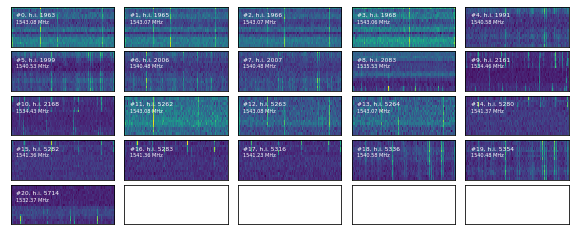

In [9]:
freqs, full_dynamic_spectrum1 = fb1.grab_data()
freqs, full_dynamic_spectrum2 = fb2.grab_data()
freqs, full_dynamic_spectrum3 = fb3.grab_data()

for l in np.unique(labels_list):

    plt.clf()

    print(f'Plotting class {l} ...')

    class_idxs = np.where(labels_list == l)[0]

    n = np.min([len(class_idxs), 300])

    #shuffle_idxs = np.arange(len(ctr_freqs))
    #np.random.shuffle(shuffle_idxs)
    #ctr_freqs_shuffled = ctr_freqs[shuffle_idxs]

    nrows = n//5
    if n%5 != 0:
        nrows += 1  # add extra row if there are leftover spectra to plot
    
    print(nrows)

    fig, axs = plt.subplots(nrows, 5, figsize=(10, n//5))
    for i in range(nrows): # rows
        for j in range(5):     # columns
            if 5*i+j <= len(class_idxs)-1:
                if class_idxs[5*i+j] <= 3070:
                    full_dynamic_spectrum = full_dynamic_spectrum1
                elif (class_idxs[5*i+j] >= 3071) and (class_idxs[5*i+j] <= 3386):
                    full_dynamic_spectrum = full_dynamic_spectrum2
                else:
                    full_dynamic_spectrum = full_dynamic_spectrum3
                dynamic_spectrum = full_dynamic_spectrum[:,
                                                        np.where((freqs < ctr_freqs[class_idxs[5*i+j]]+0.00135) & 
                                                                (freqs > ctr_freqs[class_idxs[5*i+j]]-0.00135))[0]
                                                                ]
                if nrows > 1:
                    axs[i][j].imshow(np.log10(dynamic_spectrum), aspect='auto', interpolation='none')
                    axs[i][j].text(0.05, 0.75, f'#{5*i+j}, h.i. {class_idxs[5*i+j]}', size=6, color='white', horizontalalignment='left', transform=axs[i][j].transAxes)
                    axs[i][j].text(0.05, 0.58, f'{round(ctr_freqs[class_idxs[5*i+j]], 2)} MHz', size=5, color='white', horizontalalignment='left', transform=axs[i][j].transAxes)
                else:
                    axs[j].imshow(np.log10(dynamic_spectrum), aspect='auto', interpolation='none')
                    axs[j].text(0.05, 0.75, f'#{5*i+j}, h.i. {class_idxs[5*i+j]}', size=6, color='white', horizontalalignment='left', transform=axs[j].transAxes)
                    axs[j].text(0.05, 0.58, f'{round(ctr_freqs[class_idxs[5*i+j]], 2)} MHz', size=5, color='white', horizontalalignment='left', transform=axs[j].transAxes)
            if nrows > 1:
                axs[i][j].set_xticklabels([])
                axs[i][j].set_yticklabels([])
                axs[i][j].set_yticks([])
                axs[i][j].set_xticks([])
            else:
                axs[j].set_xticklabels([])
                axs[j].set_yticklabels([])
                axs[j].set_yticks([])
                axs[j].set_xticks([])


    #fig.suptitle(f'class {l} hits',  fontsize=12, y=0.9)
    plt.subplots_adjust(wspace=0.1, hspace=0.12)
    plt.savefig(f'/datax/scratch/benjb/PCA_M31_setigen_HIP2792_HIP3223_10_2_0.15_class_{l}_hits.pdf', bbox_inches='tight')

Plotting class -1 ...
44


<Figure size 432x288 with 0 Axes>

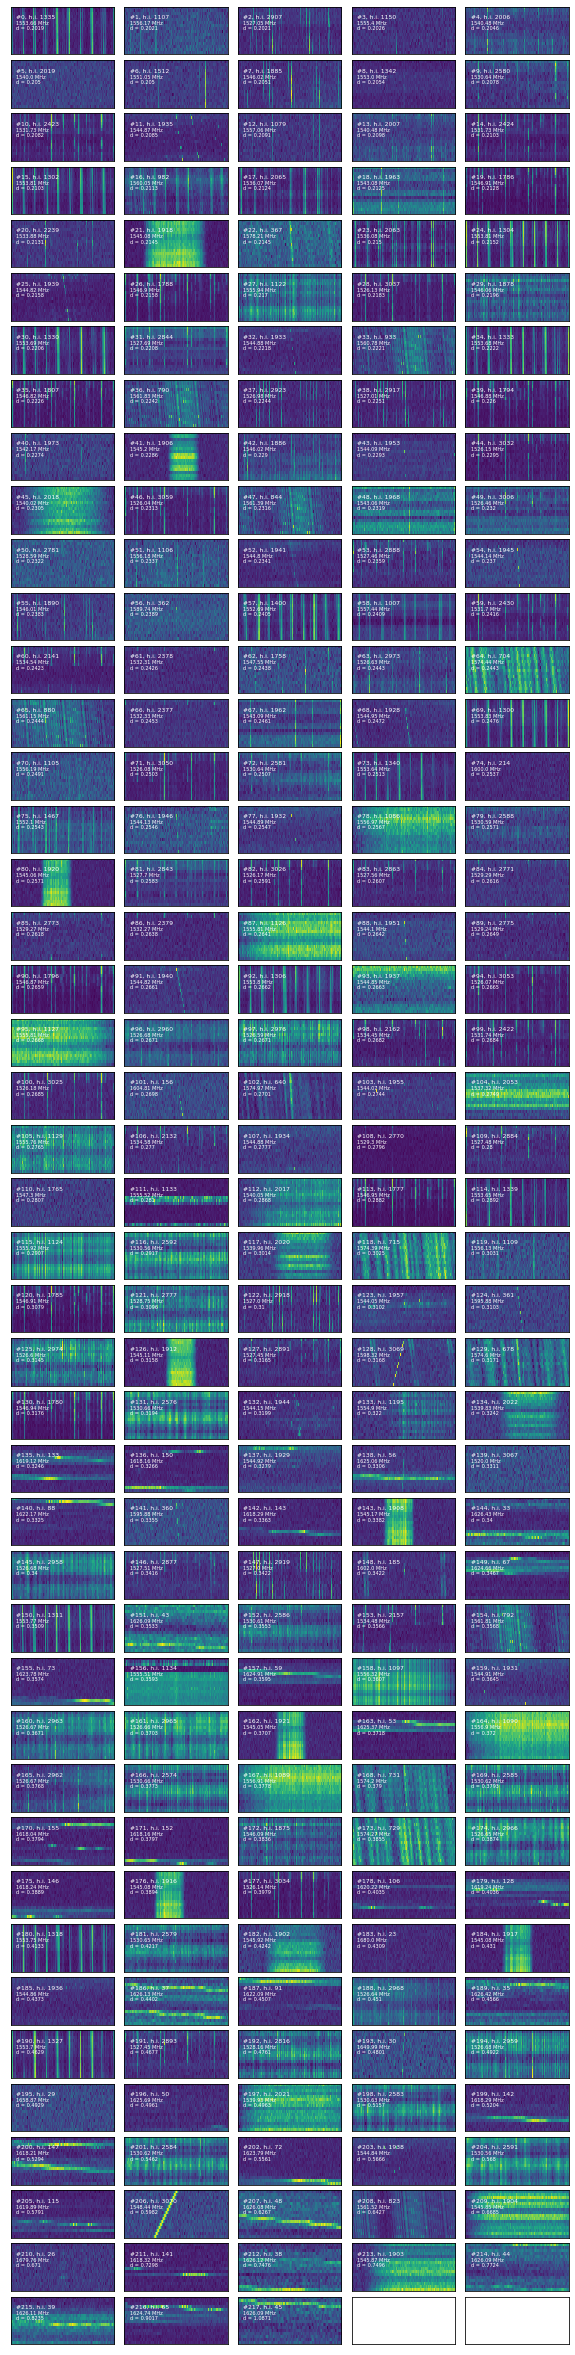

In [28]:
### FOR PLOTTING ANOMALOUS IDXS IN RANKING ORDER


freqs, full_dynamic_spectrum = fb.grab_data()

for l in np.unique(labels_list):

    l = -1

    plt.clf()

    print(f'Plotting class {l} ...')

    class_idxs = sorted_anomalous_idxs

    n = np.min([len(class_idxs), 200])
    n = len(class_idxs)
    #n = 20

    #shuffle_idxs = np.arange(len(ctr_freqs))
    #np.random.shuffle(shuffle_idxs)
    #ctr_freqs_shuffled = ctr_freqs[shuffle_idxs]

    nrows = n//5
    if n%5 != 0:
        nrows += 1  # add extra row if there are leftover spectra to plot
    
    print(nrows)

    fig, axs = plt.subplots(nrows, 5, figsize=(10, n//5))
    for i in range(nrows): # rows
        for j in range(5):     # columns
            if 5*i+j <= len(class_idxs)-1:
                dynamic_spectrum = full_dynamic_spectrum[:,
                                                        np.where((freqs < ctr_freqs[class_idxs[5*i+j]]+0.00135) & 
                                                                (freqs > ctr_freqs[class_idxs[5*i+j]]-0.00135))[0]
                                                                ]
                if nrows > 1:
                    axs[i][j].imshow(np.log10(dynamic_spectrum), aspect='auto', interpolation='none')
                    axs[i][j].text(0.05, 0.75, f'#{5*i+j}, h.i. {class_idxs[5*i+j]}', size=6, color='white', horizontalalignment='left', transform=axs[i][j].transAxes)
                    axs[i][j].text(0.05, 0.62, f'{round(ctr_freqs[class_idxs[5*i+j]], 2)} MHz', size=5, color='white', horizontalalignment='left', transform=axs[i][j].transAxes)
                    axs[i][j].text(0.05, 0.51, f'd = {round(sorted_distance_rankings[5*i+j], 4)}', size=5, color='white', horizontalalignment='left', transform=axs[i][j].transAxes)
                else:
                    axs[j].imshow(np.log10(dynamic_spectrum), aspect='auto', interpolation='none')
                    axs[j].text(0.05, 0.75, f'#{5*i+j}, h.i. {class_idxs[5*i+j]}', size=6, color='white', horizontalalignment='left', transform=axs[j].transAxes)
                    axs[j].text(0.05, 0.58, f'{round(ctr_freqs[class_idxs[5*i+j]], 2)} MHz', size=5, color='white', horizontalalignment='left', transform=axs[j].transAxes)
            if nrows > 1:
                axs[i][j].set_xticklabels([])
                axs[i][j].set_yticklabels([])
                axs[i][j].set_yticks([])
                axs[i][j].set_xticks([])
            else:
                axs[j].set_xticklabels([])
                axs[j].set_yticklabels([])
                axs[j].set_yticks([])
                axs[j].set_xticks([])


    #fig.suptitle(f'class {l} hits',  fontsize=12, y=0.9)
    plt.subplots_adjust(wspace=0.1, hspace=0.12)
    plt.savefig(f'/datax/scratch/benjb/sorted_class_{l}_hits.pdf', bbox_inches='tight')

    break

In [5]:
noise_idxs = np.where(labels_list == -1)[0]
class_0_idxs = np.where(labels_list == 0)[0]
class_1_idxs = np.where(labels_list == 1)[0]
class_2_idxs = np.where(labels_list == 2)[0]
class_3_idxs = np.where(labels_list == 3)[0]
class_4_idxs = np.where(labels_list == 4)[0]
class_5_idxs = np.where(labels_list == 5)[0]

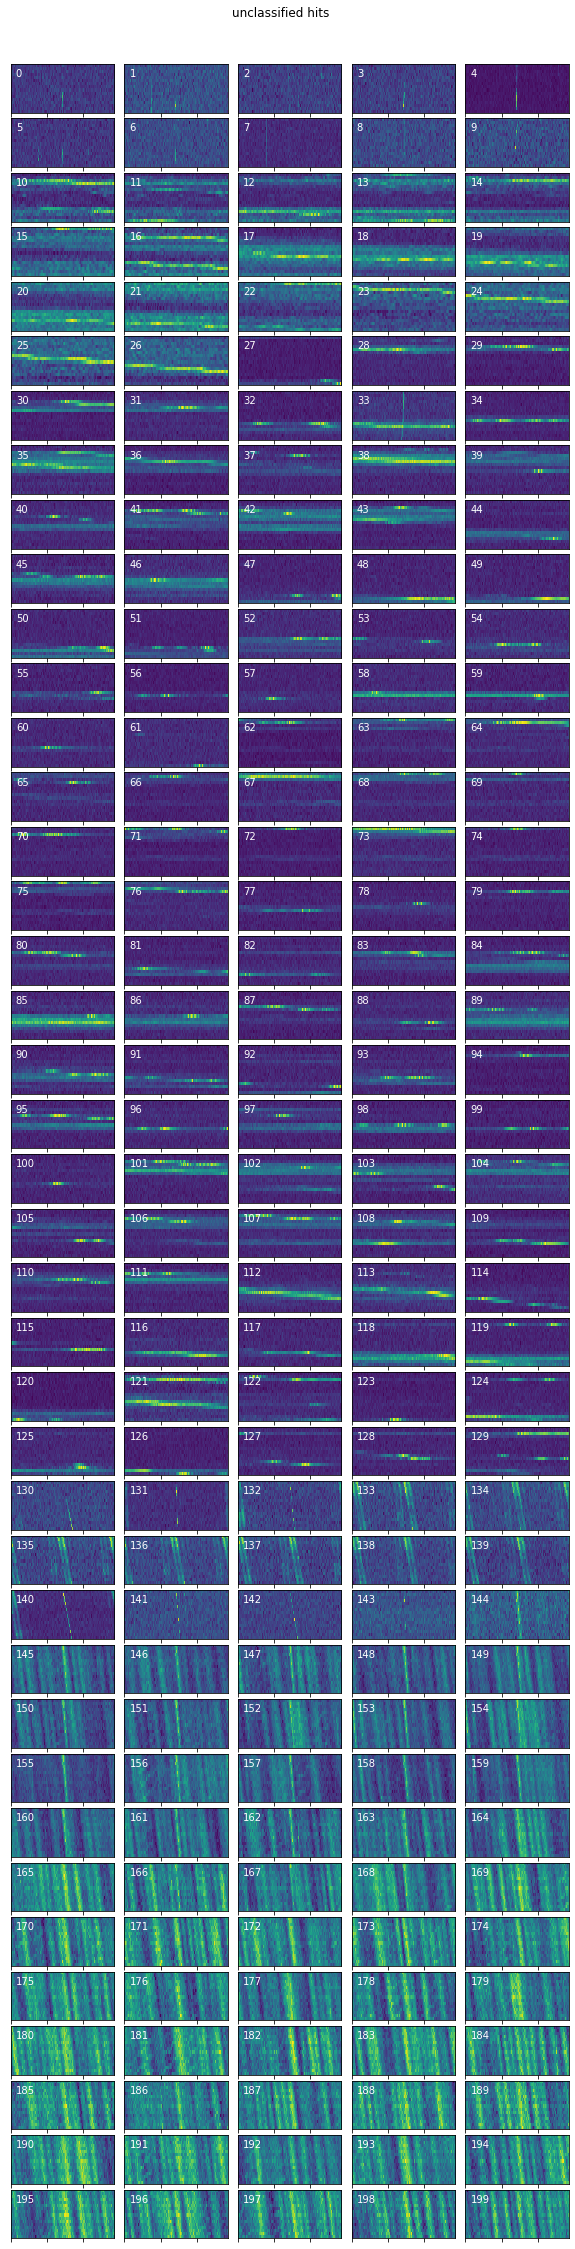

In [9]:
freqs, full_dynamic_spectrum = fb.grab_data()

n = np.min([len(noise_idxs), 200])

#shuffle_idxs = np.arange(len(ctr_freqs))
#np.random.shuffle(shuffle_idxs)
#ctr_freqs_shuffled = ctr_freqs[shuffle_idxs]

fig, axs = plt.subplots(n//5, 5, figsize=(10, n//5))
for i in range(n//5): # rows
    for j in range(5):     # columns
        dynamic_spectrum = full_dynamic_spectrum[:,
                                                 np.where((freqs < ctr_freqs[noise_idxs[5*i+j]]+0.00135) & 
                                                          (freqs > ctr_freqs[noise_idxs[5*i+j]]-0.00135))[0]
                                                          ]
        axs[i][j].imshow(np.log10(dynamic_spectrum), aspect='auto', interpolation='none')
        axs[i][j].set_xticklabels([])
        axs[i][j].set_yticklabels([])
        axs[i][j].set_yticks([])
        axs[i][j].set_xticks([])
        axs[i][j].text(0.05, 0.75, f'{5*i+j}', size=10, color='white', horizontalalignment='left', transform=axs[i][j].transAxes)

fig.suptitle('unclassified hits',  fontsize=12, y=0.9)
plt.subplots_adjust(wspace=0.1, hspace=0.12)
#plt.savefig('/datax/scratch/benjb/unclassified_hits.pdf', bbox_inches='tight')

#fb.plot_waterfall(f_start=ctr_freqs[class_3_idxs[idx]]-0.001, f_stop=ctr_freqs[class_3_idxs[idx]]+0.001, logged=True)

In [35]:
print(noise_idxs[25])
freqs, full_dynamic_spectrum = fb.grab_data()

47


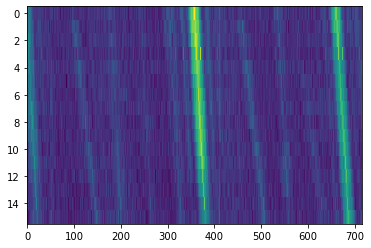

In [48]:
dynamic_spectrum = full_dynamic_spectrum[:,
                                                 np.where((freqs < ctr_freqs[501]+0.001) & 
                                                          (freqs > ctr_freqs[501]-0.001))[0]
                                                          ]

plt.imshow(np.log10(dynamic_spectrum), aspect='auto', interpolation='none')
plt.show()

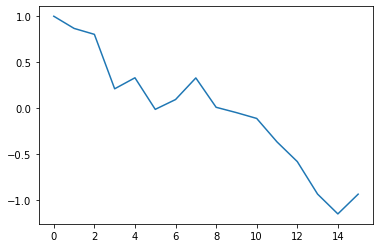

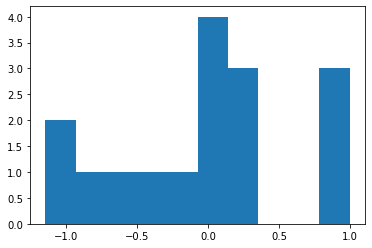

In [49]:
time_series = np.average(dynamic_spectrum, axis=1)
#time_series = np.log10(time_series)

normalized_time_series = (time_series-np.median(time_series))/np.max(time_series-np.median(time_series))

plt.plot(normalized_time_series)
plt.show()

plt.hist(normalized_time_series)
plt.show()

In [50]:
print(kurtosis(normalized_time_series[:], fisher=False))
print(skew(normalized_time_series))

2.203027534472344
-0.1478123515844345
